## Motivation to us gelpy

Analyzing the Current Situation

- We often disregard valuable information as quantitative gel analysis is only carried out when strictly necessary.
- There's a lack of reproducibility, as analysis performed using Fiji isn't reliable, given that ROIs are manually drawn.
- Data availability is poor; post lane profile extraction in Fiji, the csv files need to be loaded and organized again for Python usage.
- The sharability aspect is quite weak; typically, images and reproducible analysis code, if any, are shared separately, making it challenging to check and continue work on them.

Defining the Goals of Gelpy

- Easy data extraction: Gelpy aims to make quantitative data extraction a seamless task that requires minimal thought.
- Absolute reproducibility: With the same gel, same code, and same parameter, expect identical results every time.
- Direct data access: Whether it's the image, line profiles, or relative peak areas, everything is readily available as a Python object for immediate use in custom analysis.
- Comprehensive sharing: You can export the Gelpy object, share it, and someone else can open it, including your analysis. Collaborators will love this trick.

Present State of Gelpy:

In its current form, **Gelpy is good enough to try, raw enough to contribute**.

## Introduction to the Package

#### Usecase 1: Streamlined Visualization and Documentation Preparation

##### Traditional Approach:

Imagine being in the lab, capturing some images of a gel that mildly interest you, probably to verify an experiment. Previously, you might have skipped processing the image, or perhaps navigated to PowerPoint to label each well before adding the gel to your documentation.

##### Gelpy's Approach:

With Gelpy, you simply capture the image, open a Jupyter notebook, swiftly set up the gel, plot the most captivating lanes, save the formatted images, and incorporate them into your documentation. All within a few minutes.

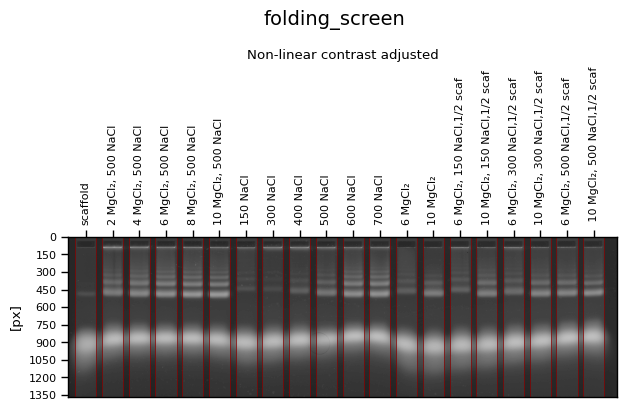

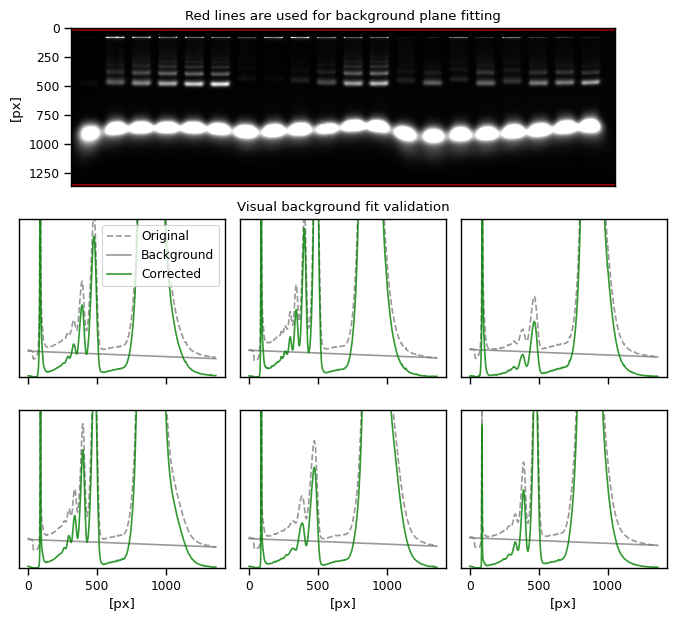

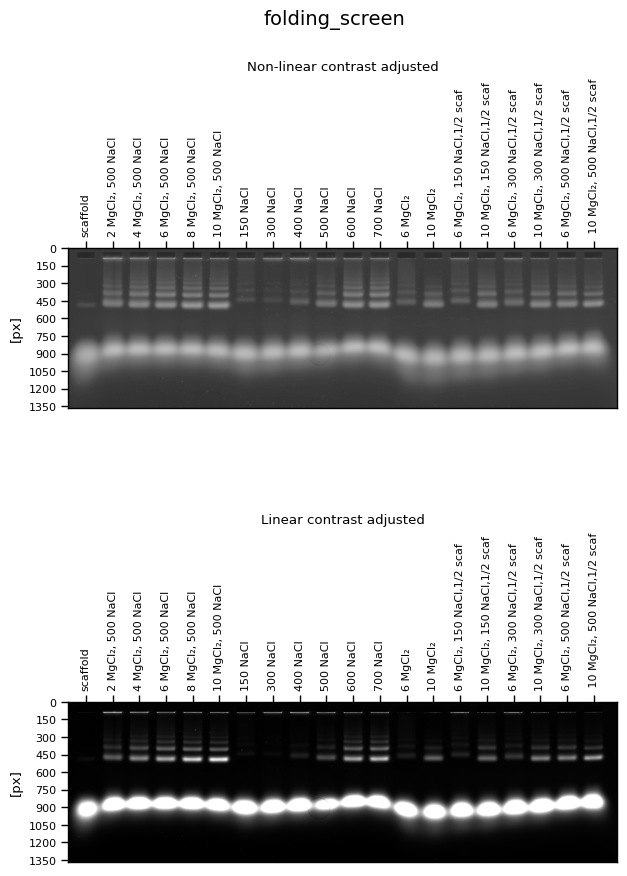

In [1]:
from gelpy import Gel

gel = Gel("./data/folding_screen.tif") # reading in a raw .tif image


# gel.setup_gel()
# gel.show_adjusted_images(save_adjusted_gels="test123.jpg")

# gel.setup_gel(x_label_pos=(150, 4480, 20), 
#               remove_bg=True)           #, line_profile_width=150)

labels = ["scaffold", "2 MgCl₂, 500 NaCl","4 MgCl₂, 500 NaCl","6 MgCl₂, 500 NaCl","8 MgCl₂, 500 NaCl","10 MgCl₂, 500 NaCl","150 NaCl","300 NaCl","400 NaCl","500 NaCl","600 NaCl", "700 NaCl","6 MgCl₂","10 MgCl₂","6 MgCl₂, 150 NaCl,1/2 scaf","10 MgCl₂, 150 NaCl,1/2 scaf","6 MgCl₂, 300 NaCl,1/2 scaf","10 MgCl₂, 300 NaCl,1/2 scaf","6 MgCl₂, 500 NaCl,1/2 scaf"," 10 MgCl₂, 500 NaCl,1/2 scaf"]
gel.setup_gel(labels=labels, x_label_pos=(150, 4485, 20),
              label_rotation=90,
              line_profile_width=180,
              remove_bg=True,
              img_height_factor=1) # increase if labels and titles are overlapping
gel.show_adjusted_images()

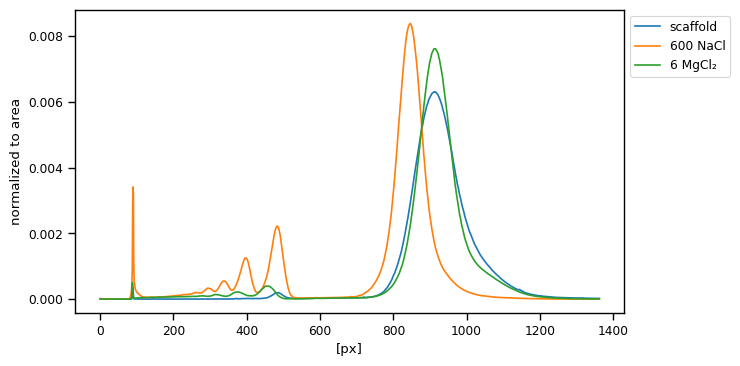

In [2]:
# Analyze and plot the lane profiles

# gel.show_line_profiles()
# gel.show_line_profiles(select_lanes=[".*150 *", ".*300.*"], save_overview="overview_plots_2.svg") #Regrex enabled!
gel.show_line_profiles(select_lanes=["scaffold",12,"600 NaCl"], save_overview="overview_plots_1.png")

#### Usecase 2: In-depth Analysis of a DNA Origami Folding Screen

##### Traditional Approach: 

Post image capture, you load it into Fiji, adjust the contrast and so forth, google the Fiji gel analysis process again, begin drawing rectangles, generate line profiles, draw lines in these profiles to segregate peaks, use the magic wand tool to ascertain the area within each marked peak, export the data as a csv file, import the csv file into Python, start plotting the data, all while pondering if the rectangle or line should have been drawn slightly to the left or right.

##### Gelpy's Approach:

 After capturing the image, you open a Jupyter notebook, swiftly set up the gel, plot and analyze the relevant lanes, save the formatted images to include in your documentation. You can then access the Gelpy df to plot the folding yields to your own liking. Any analysis changes can be made easily. With a single command, the entire analysis and plots are updated.

Note: Illustrative fits showcasing both good and bad examples will be presented.


/home/ckarfusehr/anaconda3/envs/gelpy3/lib/python3.11/site-packages/gelpy/profile_fitting_models.py:307: RuntimeWarning: overflow encountered in exp
  return amplitude / lambda_ * np.exp(term1) * norm.cdf(term2)
/home/ckarfusehr/anaconda3/envs/gelpy3/lib/python3.11/site-packages/gelpy/profile_fitting_models.py:307: RuntimeWarning: invalid value encountered in multiply
  return amplitude / lambda_ * np.exp(term1) * norm.cdf(term2)


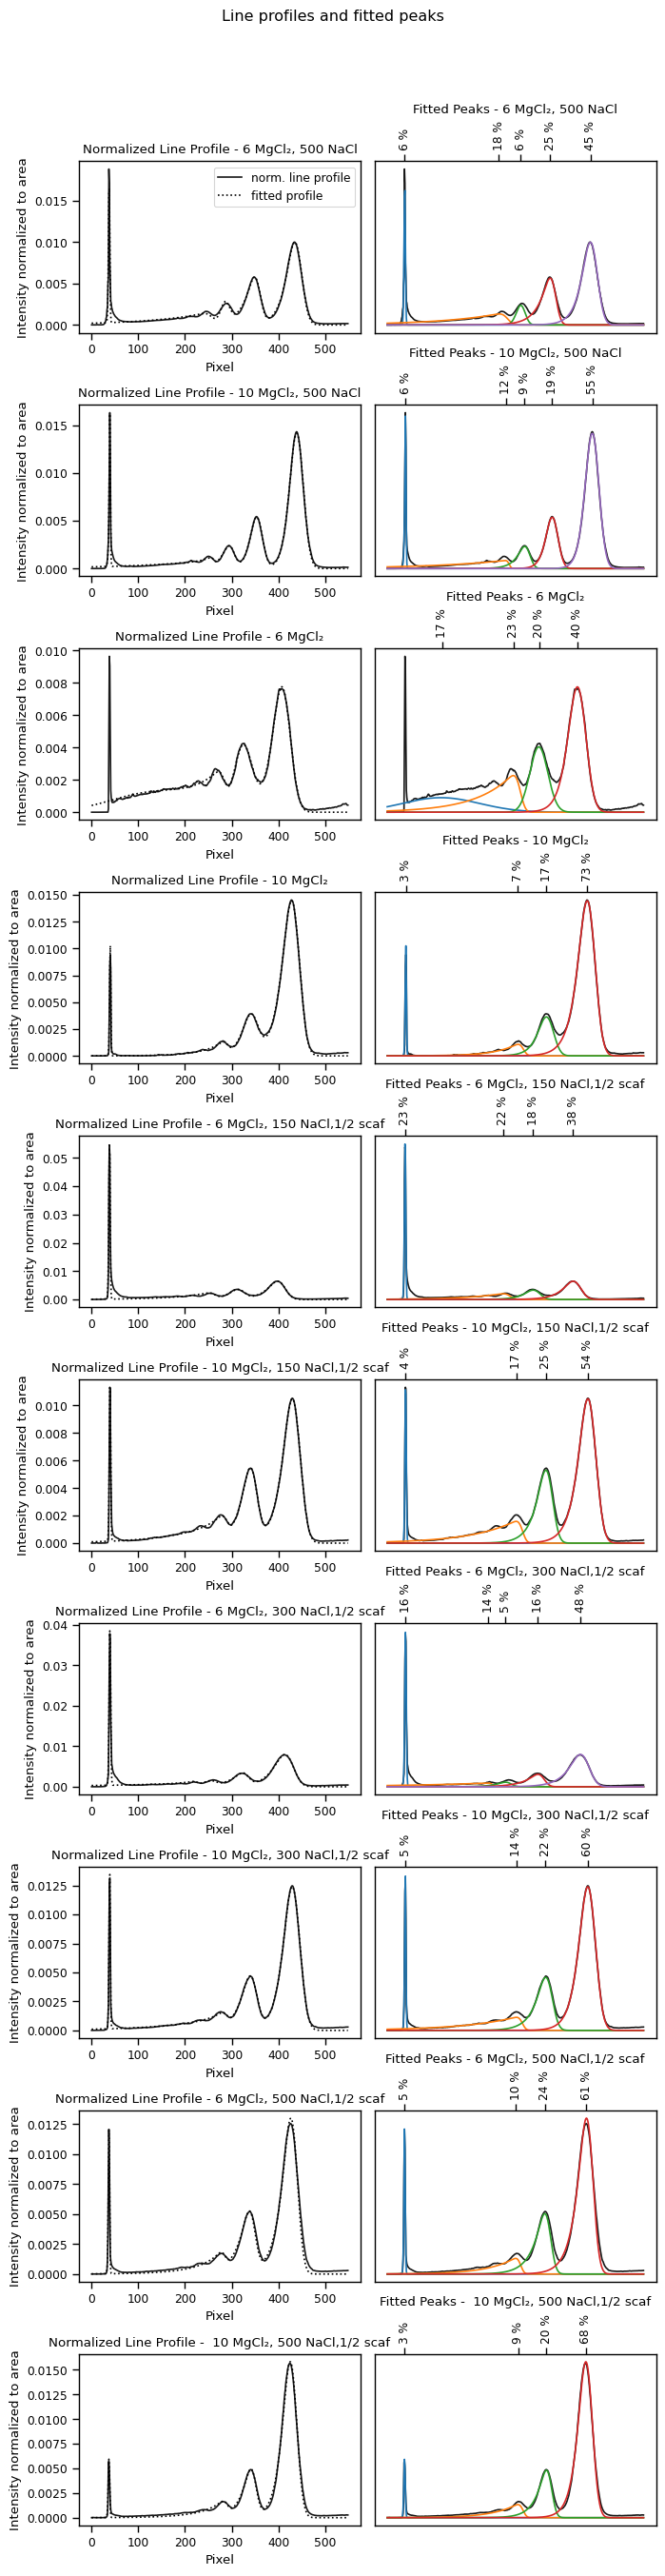

In [3]:
# Fitting selected line profiles

gel.show_line_profiles(select_lanes=[".*6 MgCl *", ".*10 MgCl*"],
                       slice_line_profile_length=(50, 600),
                       fit=True,
                       plot_fits=True,
                       maxima_prominence=0, maxima_threshold=0, peak_width=2, sigma=10,
                       show_overview=False,
                       show_df=False)

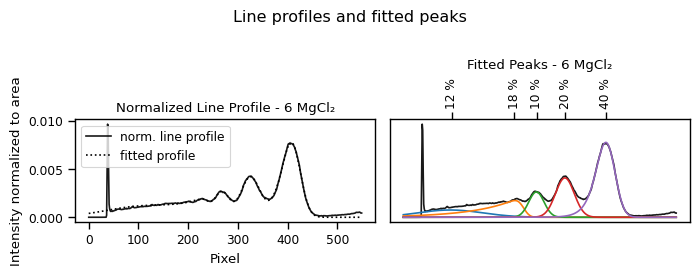

In [4]:
# Refining fit for specific line profiles. 

gel.show_line_profiles(select_lanes=[12],
                       slice_line_profile_length=(50, 600),
                       fit=True,
                       plot_fits=True,
                       maxima_prominence=0, maxima_threshold=0, peak_width=0, sigma=10,
                       show_overview=False,
                       show_df=False,)

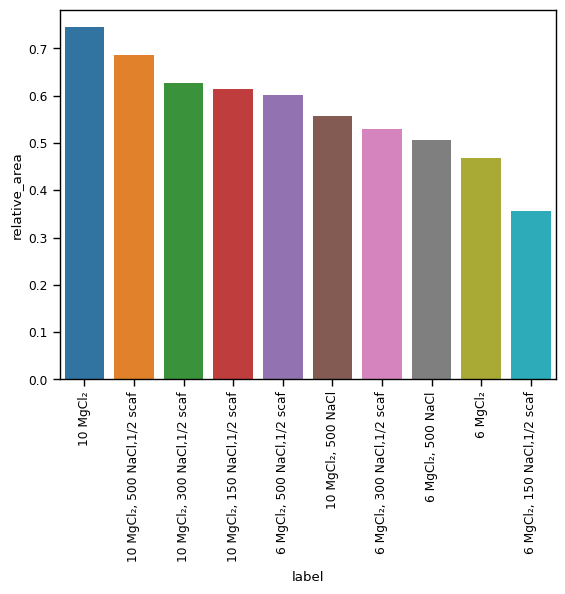

In [5]:
# Integrating the fitted data into custom python code

gel.show_line_profiles(select_lanes=[".*6 MgCl *", ".*10 MgCl*"],
                       slice_line_profile_length=(50, 600),
                       fit=True,
                       plot_fits=False,
                       maxima_prominence=0.0004, maxima_threshold=0.00025,
                       show_overview=False,
                       show_df=False)
                        


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Fit data is saved in a pandas data frame
labels = gel.Image.labels
fit_df = gel.LineFits.fit_model.fit_df

# Some pandas data prep
df_max_band = fit_df.loc[fit_df.groupby('selected_lane_index')['band_number'].idxmax()]
df_max_band = df_max_band.sort_values('relative_area', ascending=False)
labels = df_max_band['label'].tolist()

# Plot
sns.barplot(x='label', y='relative_area', data=df_max_band, order=labels)
plt.xticks(rotation=90)
plt.show()



#### Usecase 3: Efficient Data Sharing with Colleagues

##### Traditional Approach:

After analysis, you might send an annotated image file along with your completed analysis to your colleagues. If they wish to replicate it, make a minor alteration to your analysis, or simply plot the graphs for their paper, they have to redo your work or request you to send the wirdly named csv file you stored somewhere.

##### Gelpy's Approach:

After your analysis, you just save the gel object and send it. The recipients can then unpack it, and they're all set!"

/home/ckarfusehr/anaconda3/envs/gelpy3/lib/python3.11/site-packages/gelpy/profile_fitting_models.py:307: RuntimeWarning: overflow encountered in exp
  return amplitude / lambda_ * np.exp(term1) * norm.cdf(term2)
/home/ckarfusehr/anaconda3/envs/gelpy3/lib/python3.11/site-packages/gelpy/profile_fitting_models.py:307: RuntimeWarning: invalid value encountered in multiply
  return amplitude / lambda_ * np.exp(term1) * norm.cdf(term2)


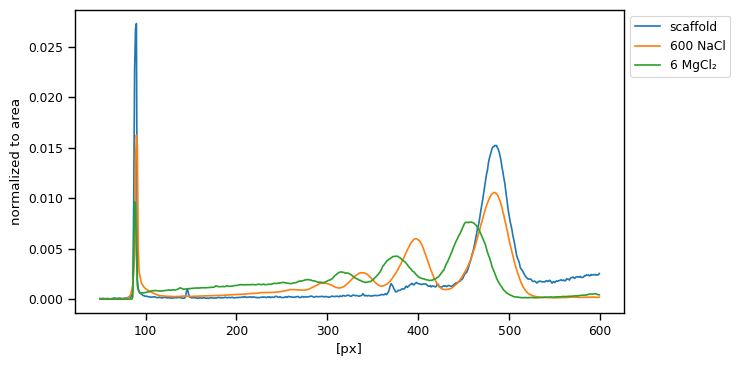

In [6]:
# Just save the pandas df

gel.show_line_profiles(select_lanes=["scaffold",12,"600 NaCl"],
                       slice_line_profile_length=(50, 600),
                       fit=True,
                       maxima_prominence=0.0004, maxima_threshold=0.00025,
                       plot_fits=False,
                       show_df=False,
                       save_df="folding_screen_NaCl_conditions.csv")

In [7]:
# Just save the complete gel object

gel.save("230512_folding_screen")
#gel.save("230512_folding_screen", compress=True)

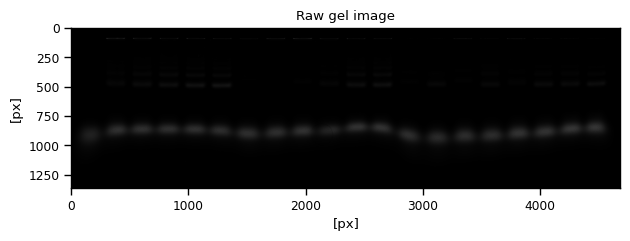

,selected_lane_index,label,band_number,relative_area,maxima_position,Amplitude,Mean,Standard Deviation,Lambda
0,0,scaffold,0,0.132,39.449,0.096,40.126,0.578,1.583
1,0,scaffold,1,0.868,435.316,0.619,444.726,12.952,13.828
2,1,600 NaCl,0,0.061,40.155,0.060,40.846,1.161,0.910
3,1,600 NaCl,1,0.221,289.919,0.231,301.718,4.938,107.618
4,1,600 NaCl,2,0.247,347.508,0.242,357.567,10.608,18.098
5,1,600 NaCl,3,0.471,433.448,0.462,443.401,13.326,14.894
6,2,6 MgCl₂,0,0.032,38.576,0.029,39.136,0.996,0.719
7,2,6 MgCl₂,1,0.283,268.242,0.275,276.830,4.159,106.257
8,2,6 MgCl₂,2,0.216,324.336,0.195,336.610,9.081,34.334
9,2,6 MgCl₂,3,0.469,407.757,0.422,420.013,10.027,29.912


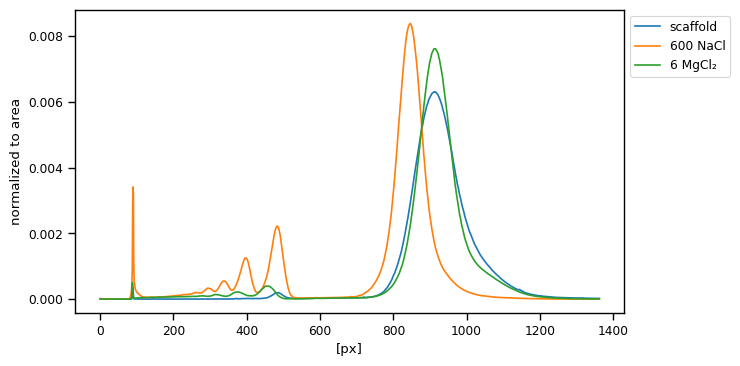

In [8]:
# Your collaborator loading it on another machine:

from gelpy import Gel
loaded_gel = Gel.load("230512_folding_screen.pkl")

loaded_gel.show_raw_gel()
loaded_gel.show_line_profiles(select_lanes=["scaffold",12,"600 NaCl"], save_overview="overview_plots_1.png")
loaded_gel.LineFits.fit_model.fit_df

## Let's Collaboratively Test, Challenge, and Enhance Gelpy!

How You Can Contribute

- Testing and Reporting: Simply use the package and report any issues or bugs on Github. I'll strive to resolve them.
- Fixing or Extending and Merging: If you know how to fix a bug or wish to expand the package, feel free to fork it, make the modifications, and submit a merge request.

## Wrapping Up

It's quite surprising that for one of the most basic experiments in life sciences, gel electrophoresis, we as researchers are doing a suboptimal job. We discard most of the data, our analysis lacks reproducibility, we experience considerable hassle in managing this data, and we don't have a standardized procedure for data sharing tied to the analysis.

Through the use cases, I aimed to convince you that while gelpy is not be the ultimate solution, it is certainly addressing these issues. In its current stage, it's good enough to try and raw enough to contribute significantly. I encourage you all to test it, challenge it, and contribute towards it. I invite you to join this fun project, aiming to improve how we conduct science, even if only a tiny bit.